In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import LambdaCallback

In [66]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Copying preprocessing steps from previous notebook


In [67]:
# Drop unneeded name columns
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [68]:
# Binning application type
application_threshold = 500
value_counts_app = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = [app_type for app_type in value_counts_app.index if value_counts_app[app_type] < application_threshold]

# Replace in dataframe - application type
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")


In [69]:
# Binning classification
classification_threshold = 800
value_counts_class = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = [cls for cls in value_counts_class.index if value_counts_class[cls] < classification_threshold]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

In [70]:
# Convert categorical data to numeric with dummies
application_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'CLASSIFICATION', 'AFFILIATION', 'ORGANIZATION', 'USE_CASE', 'INCOME_AMT','SPECIAL_CONSIDERATIONS'])
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [71]:
nn_optimisation_df = application_df.copy()

In [72]:
# Split our preprocessed data into our features and target arrays
features = nn_optimisation_df.drop(columns=['IS_SUCCESSFUL'])
target = nn_optimisation_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimising the Model via model hyperparameters

In [73]:
# Loading original model
from tensorflow.keras.models import load_model

original_model = load_model("model/AlphabetSoupCharity.h5")

In [74]:
# Confirming model loaded properly.
original_model_loss, original_model_accuracy = original_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {original_model_loss}, Accuracy: {original_model_accuracy}")

268/268 - 0s - loss: 0.5388 - accuracy: 0.7395 - 311ms/epoch - 1ms/step
Loss: 0.5388383269309998, Accuracy: 0.7394751906394958


In [14]:
# Compiling model
original_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
# Increase Epoch to higher amount (100 -> 300)
fit_model = original_model.fit(
    X_train_scaled,
    y_train,
    epochs=300
)

Epoch 1/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5432 - accuracy: 0.7346
Epoch 2/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5413 - accuracy: 0.7363
Epoch 3/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.7360
Epoch 4/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7359
Epoch 5/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.7365
Epoch 6/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5409 - accuracy: 0.7359
Epoch 7/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7368
Epoch 8/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7370
Epoch 9/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7365
Epoch 10/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5401 - accura

In [77]:
# Slightly worse performance on test set
original_model_loss, original_model_accuracy = original_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {original_model_loss}, Accuracy: {original_model_accuracy}")

268/268 - 0s - loss: 0.5505 - accuracy: 0.7354 - 232ms/epoch - 865us/step
Loss: 0.5504724383354187, Accuracy: 0.7353935837745667


In [20]:
# Adding more hidden layers + change number of neurons
original_model_adjusted = tf.keras.models.Sequential()

# First hidden layer
original_model_adjusted.add(tf.keras.layers.Dense(units=43, activation="relu", input_dim=43))

# Second hidden layer
original_model_adjusted.add(tf.keras.layers.Dense(units=22, activation="relu"))

# Third hidden layer
original_model_adjusted.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
original_model_adjusted.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
original_model_adjusted.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 43)                1892      
                                                                 
 dense_1 (Dense)             (None, 22)                968       
                                                                 
 dense_2 (Dense)             (None, 10)                230       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile new adjusted model
original_model_adjusted.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
fit_model_adjusted = original_model_adjusted.fit(
    X_train_scaled,
    y_train,
    epochs=300
)

Epoch 1/300
804/804 [==============================] - 1s 748us/step - loss: 0.5766 - accuracy: 0.7177
Epoch 2/300
804/804 [==============================] - 1s 750us/step - loss: 0.5542 - accuracy: 0.7303
Epoch 3/300
804/804 [==============================] - 1s 748us/step - loss: 0.5513 - accuracy: 0.7318
Epoch 4/300
804/804 [==============================] - 1s 733us/step - loss: 0.5497 - accuracy: 0.7328
Epoch 5/300
804/804 [==============================] - 1s 730us/step - loss: 0.5481 - accuracy: 0.7328
Epoch 6/300
804/804 [==============================] - 1s 759us/step - loss: 0.5468 - accuracy: 0.7344
Epoch 7/300
804/804 [==============================] - 1s 735us/step - loss: 0.5464 - accuracy: 0.7345
Epoch 8/300
804/804 [==============================] - 1s 737us/step - loss: 0.5456 - accuracy: 0.7352
Epoch 9/300
804/804 [==============================] - 1s 754us/step - loss: 0.5454 - accuracy: 0.7349
Epoch 10/300
804/804 [==============================] - 1s 741us/step - l

In [79]:
# Slight accuracy increase
model_loss, model_accuracy = original_model_adjusted.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5393 - accuracy: 0.7402 - 227ms/epoch - 847us/step
Loss: 0.5392518043518066, Accuracy: 0.7401749491691589


## Attempt to change input data

In [30]:
# Creating copy of dataframe just in case
nn_optimisation_df = application_df.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e86bbda310>,
 'caps': [<matplotlib.lines.Line2D at 0x1e86bbda850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e86bbda070>],
 'medians': [<matplotlib.lines.Line2D at 0x1e86bbdad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e86bbe80a0>],
 'means': []}

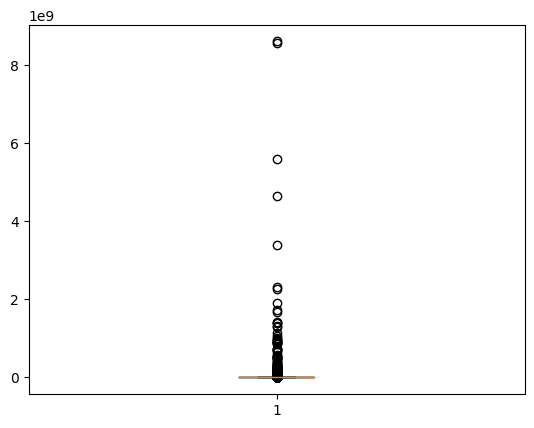

In [31]:
# Plotting distribution of ASK_AMT column
import matplotlib.pyplot as plt

plt.boxplot(nn_optimisation_df['ASK_AMT'])

In [62]:
# Can see that the median is very low (5000), with max numbers in the billion.
nn_optimisation_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [ ]:
# Create new dataframe for less than one million ask amount
askamt_restriction_df = nn_optimisation_df.loc[nn_optimisation_df['ASK_AMT'] < 1_000_000]
askamt_restriction_df.shape

In [ ]:
# Split and scale data on new restricted dataframe
features = askamt_restriction_df.drop(columns=['IS_SUCCESSFUL'])
target = askamt_restriction_df['IS_SUCCESSFUL']

X_train, X_test, y_train, y_test = train_test_split(features, target)

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [80]:
# New adjusted model
nn_model_adjusted = tf.keras.models.Sequential()

# First hidden layer
nn_model_adjusted.add(tf.keras.layers.Dense(units=43, activation="relu", input_dim=43))

# Second hidden layer
nn_model_adjusted.add(tf.keras.layers.Dense(units=22, activation="relu"))

# Third hidden layer
nn_model_adjusted.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn_model_adjusted.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_adjusted.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 43)                1892      
                                                                 
 dense_5 (Dense)             (None, 22)                968       
                                                                 
 dense_6 (Dense)             (None, 10)                230       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Compile new model
nn_model_adjusted.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [82]:
# Fitting on training data
fit_model_adjusted = nn_model_adjusted.fit(
    X_train_scaled,
    y_train,
    epochs=300
)

Epoch 1/300
804/804 [==============================] - 2s 1ms/step - loss: 0.5741 - accuracy: 0.7177
Epoch 2/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7273
Epoch 3/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5525 - accuracy: 0.7295
Epoch 4/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7301
Epoch 5/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7290
Epoch 6/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5491 - accuracy: 0.7304
Epoch 7/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7310
Epoch 8/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7317
Epoch 9/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7318
Epoch 10/300
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accura

In [83]:
# No accuracy increase detected doing this
model_loss, model_accuracy = nn_model_adjusted.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5613 - accuracy: 0.7333 - 305ms/epoch - 1ms/step
Loss: 0.5612531900405884, Accuracy: 0.7332944869995117


In [85]:
# Export our model to HDF5 file
os.makedirs("model", exist_ok=True)
nn_model_adjusted.save("model/AlphabetSoupCharityAdjusted.h5")